<a href="https://colab.research.google.com/github/ScarlettQiu/OCR_for_Bank_Statement/blob/main/FSRCNN_PyTesseract_loan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#need to install pytersseract before importing it
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (7,688 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.8 MB/s eta 0:00:00


In [3]:
import cv2
from cv2 import dnn_superres
import pytesseract
import matplotlib.pyplot as plt

In [4]:
#check the version of cv2, it should be higher than 4.3
print(cv2.__version__)

4.7.0


In [5]:
#git clone the image dataset from GitHub
url = 'https://github.com/ScarlettQiu/OCR_for_Bank_Statement/tree/dc3b2388bc59637feef5cfafa6b146f6511cc3b4/Dataset'
!git clone https://github.com/ScarlettQiu/OCR_for_Bank_Statement.git 

Cloning into 'OCR_for_Bank_Statement'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 79 (delta 23), reused 27 (delta 2), pack-reused 0
Unpacking objects: 100% (79/79), 11.65 MiB | 6.37 MiB/s, done.


In [6]:
def up_resolution(img_path, model_path):
  # Create an SR object
  sr = dnn_superres.DnnSuperResImpl_create()
  # Read image
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
  # Read the desired model 
  sr.readModel(model_path)
  # Set the desired model and scale to get correct pre- and post-processing
  sr.setModel("edsr", 3)
  # Upscale the image
  result = sr.upsample(image)
  # Save the image
  cv2.imwrite("./upscaled.png", result)

In [7]:
model_path = "OCR_for_Bank_Statement/FSRCNN_x2.pb"
img_path = "OCR_for_Bank_Statement/Dataset2/loan1.png"

In [8]:
up_resolution(img_path, model_path)

In [9]:
#convert image to string
img_loan1 = cv2.imread('upscaled.png')

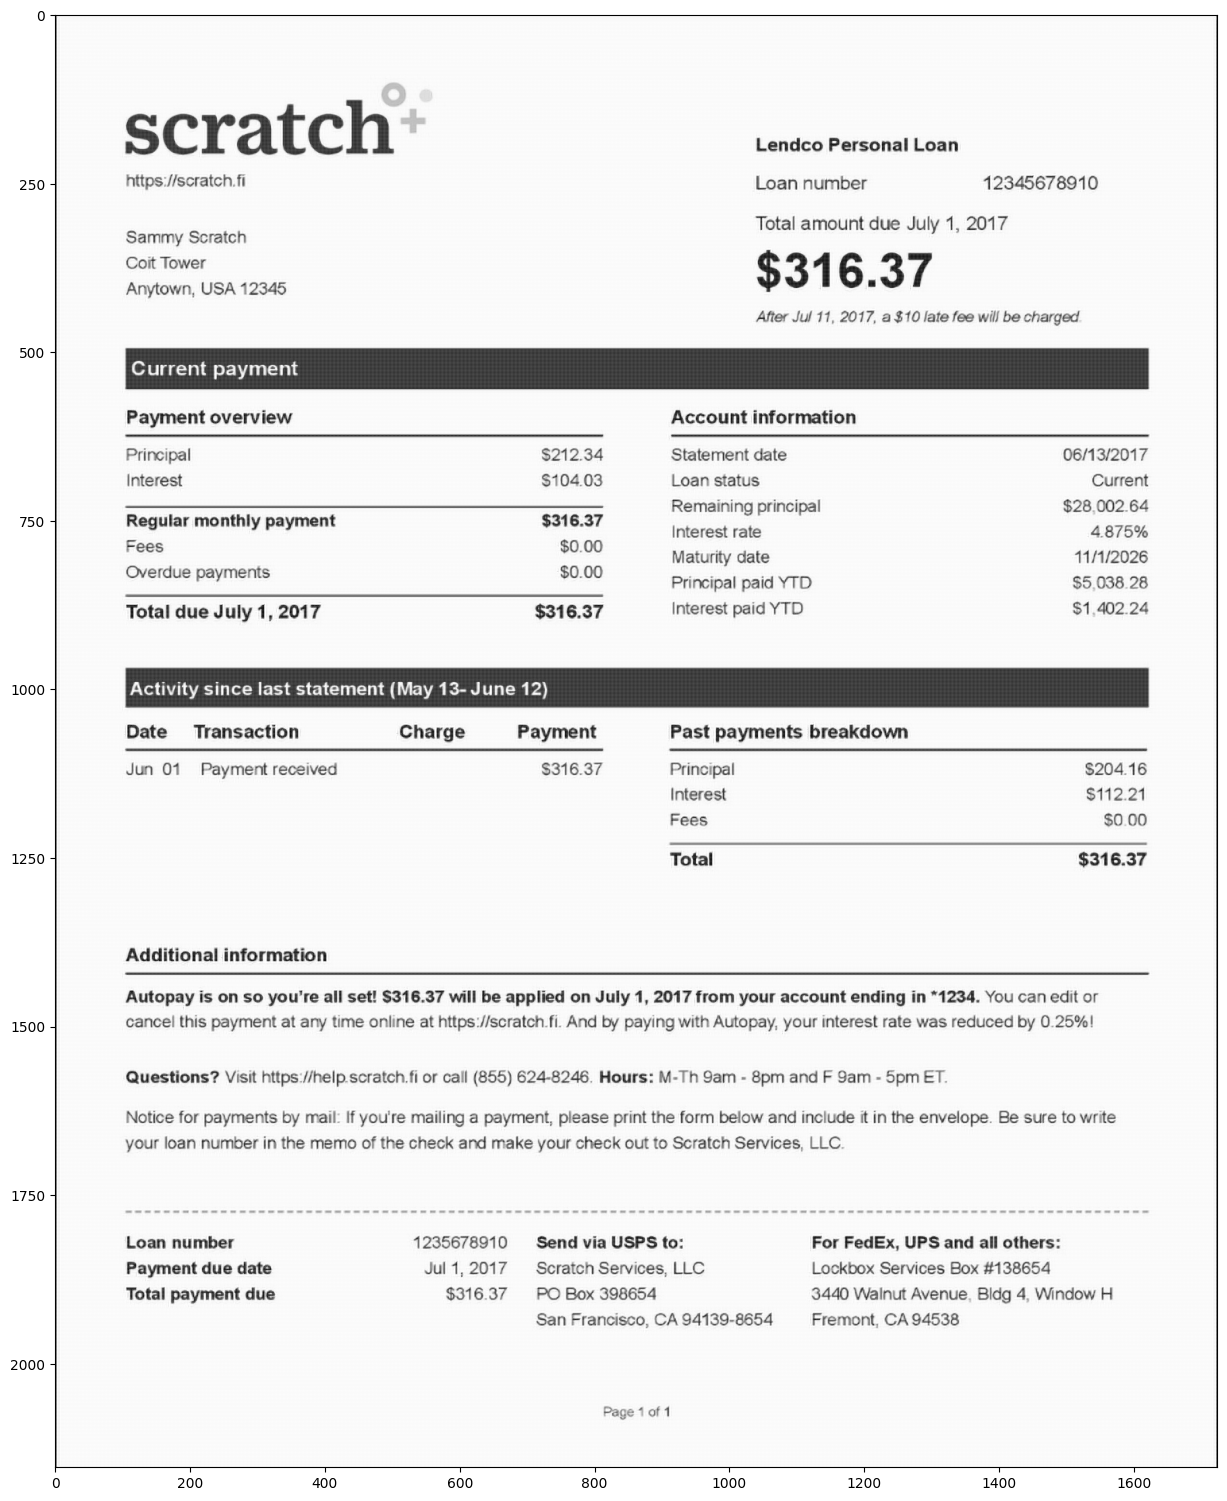

In [10]:
fig, ax = plt.subplots(figsize=(15,20))
plt.imshow(img_loan1)

In [11]:
#Extract the text using pytesseract
loan1_text = pytesseract.image_to_string(img_loan1)

In [12]:
print(loan1_text)

 

 

scratch

https://scratch.fi

Sammy Scratch
Coit Tower
Anytown, USA 12345

Lendco Personal Loan

Loan number 12345678910

Total amount due July 1, 2017

$316.37

After Jul 11, 2017, a $10 late fee will be charged

Current payment

Payment overview
Principal

Interest

Regular monthly payment
Fees
Overdue payments

Total due July 1, 2017

$212.34
$104.03

$316.37
$0.00
$0.00

$316.37

Activity since last statement (May 13- June 12)

Account information

Statement date 06/13/2017

Loan status Current
Remaining principal $28,002.64
Interest rate 4.875%
Maturity date 41/1/2026
Principal paid YTD $5,038.28
Interest paid YTD $1,402.24

Date Transaction

Jun 01 Payment received

Additional information

Charge Payment
$316.37

Past payments breakdown

Principal $204.16

 

Interest $112.21
Fees $0.00
Total $316.37

Autopay is on so you're all set! $316.37 will be applied on July 1, 2017 from your account ending in *1234. You can edit or
cancel this payment at any time online at https://sc

In [13]:
#Check the levenshtein distance
from Levenshtein import distance

ground_value = ''' 

 

scratch

https://scratch.fi

Sammy Scratch
Coit Tower
Anytown, USA 12345

Lendco Personal Loan

Loan number 12345678910

Total amount due July 1, 2017

$316.37

After Jul 11, 2017, a $10 late fee will be charged

Current payment

Payment overview
Principal

Interest

Regular monthly payment
Fees
Overdue payments

Total due July 1, 2017

$212.34
$104.03

$316.37
$0.00
$0.00

$316.37

Activity since last statement (May 13- June 12)

Account information

Statement date 06/13/2017

Loan status Current
Remaining principal $28,002.64
Interest rate 4.875%
Maturity date 41/1/2026
Principal paid YTD $5,038.28
Interest paid YTD $1,402.24

Date Transaction

Jun 01 Payment received

Additional information

Charge Payment
$316.37

Past payments breakdown

Principal $204.16

 

Interest $112.21
Fees $0.00
Total $316.37

Autopay is on so you're all set! $316.37 will be applied on July 1, 2017 from your account ending in *1234. You can edit or
cancel this payment at any time online at https://scratch.fi. And by paying with Autopay, your interest rate was reduced by 0.25%!

Questions? Visit https://help.scratch.fi or call (855) 624-8246. Hours: M-Th 9am - 8pm and F 9am - 5pm ET.

Notice for payments by mail: If you're mailing a payment, please print the form below and include it in the envelope. Be sure to write
your loan number in the memo of the check and make your check out to Scratch Services, LLC.

Loan number
Payment due date
Total payment due

1235678910 Send via USPS to: For FedEx, UPS and all others:

Jul1,2017 Scratch Services,
$316.37. PO Box 398654

LLC Lockbox Services Box #138654
3440 Walnut Avenue, Bidg 4, Window H

San Francisco, CA 94139-8654 Fremont, CA 94538

Page 1 of 1


'''


print(distance(ground_value, loan1_text))

3


In [14]:
#check the accuracy using sequence matcher
from difflib import SequenceMatcher

sm = SequenceMatcher(None, loan1_text, ground_value)
true_positive_char_num = 0
for tag, i1, i2, j1, j2 in sm.get_opcodes():
    if tag== 'equal':
        true_positive_char_num += (j2 - j1)
    else:
        pass

print(f'accuracy = {true_positive_char_num/len(ground_value)}')

accuracy = 0.9988304093567252
